<a href="https://colab.research.google.com/github/faiyaz0987/Deel/blob/main/Fashion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Activation
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [15]:
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)
display(y_train_encoded)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Flatten the data before scaling
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

scaler = MinMaxScaler()
x_train_scaled_sklearn = scaler.fit_transform(x_train_flattened)
x_test_scaled_sklearn = scaler.transform(x_test_flattened)

print("Scaled x_train shape using sklearn:", x_train_scaled_sklearn.shape)
print("Scaled x_test shape using sklearn:", x_test_scaled_sklearn.shape)

Scaled x_train shape using sklearn: (60000, 784)
Scaled x_test shape using sklearn: (10000, 784)


In [17]:
classes = to_categorical(y_train, num_classes=10)
classes

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
class_names_list = list(fashion_mnist_labels.values())
print("List of Fashion MNIST class names:")
print(class_names_list)

List of Fashion MNIST class names:
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [19]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [20]:
learning_rate = 0.01
optimier = Adagrad(learning_rate=learning_rate)
model.compile(optimizer=optimier, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train_scaled_sklearn, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6388 - loss: 1.0191 - val_accuracy: 0.8264 - val_loss: 0.4953
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8089 - loss: 0.5478 - val_accuracy: 0.8397 - val_loss: 0.4381
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8265 - loss: 0.4910 - val_accuracy: 0.8475 - val_loss: 0.4235
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8425 - loss: 0.4468 - val_accuracy: 0.8603 - val_loss: 0.3939
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8451 - loss: 0.4362 - val_accuracy: 0.8598 - val_loss: 0.3854
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8538 - loss: 0.4134 - val_accuracy: 0.8673 - val_loss: 0.3738
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8554 - loss: 0.4078 - val_accuracy: 0.8697 - val_loss: 0.3656
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8608 - loss: 0.3863 -

In [22]:
loss, accuracy = model.evaluate(x_test_scaled_sklearn, y_test_encoded)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3709
Test Loss: 0.3789
Test Accuracy: 86.40%


In [36]:
prediction = model.predict(x_test_scaled_sklearn[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [37]:
print(np.argmax(prediction, axis = 1))

[9 2 1 1 6 1 4 6 5 7]


In [29]:

predicted_classes_indices = np.argmax(prediction, axis=1)


predicted_class_names = [class_names_list[index] for index in predicted_classes_indices]


print("First 10 predicted class names:")
for i in range(10):
    print(f"Sample {i+1}: {predicted_class_names[i]}")

First 10 predicted class names:
Sample 1: Ankle boot
Sample 2: Pullover
Sample 3: Trouser
Sample 4: Trouser
Sample 5: Shirt
Sample 6: Trouser
Sample 7: Coat
Sample 8: Shirt
Sample 9: Sandal
Sample 10: Sneaker


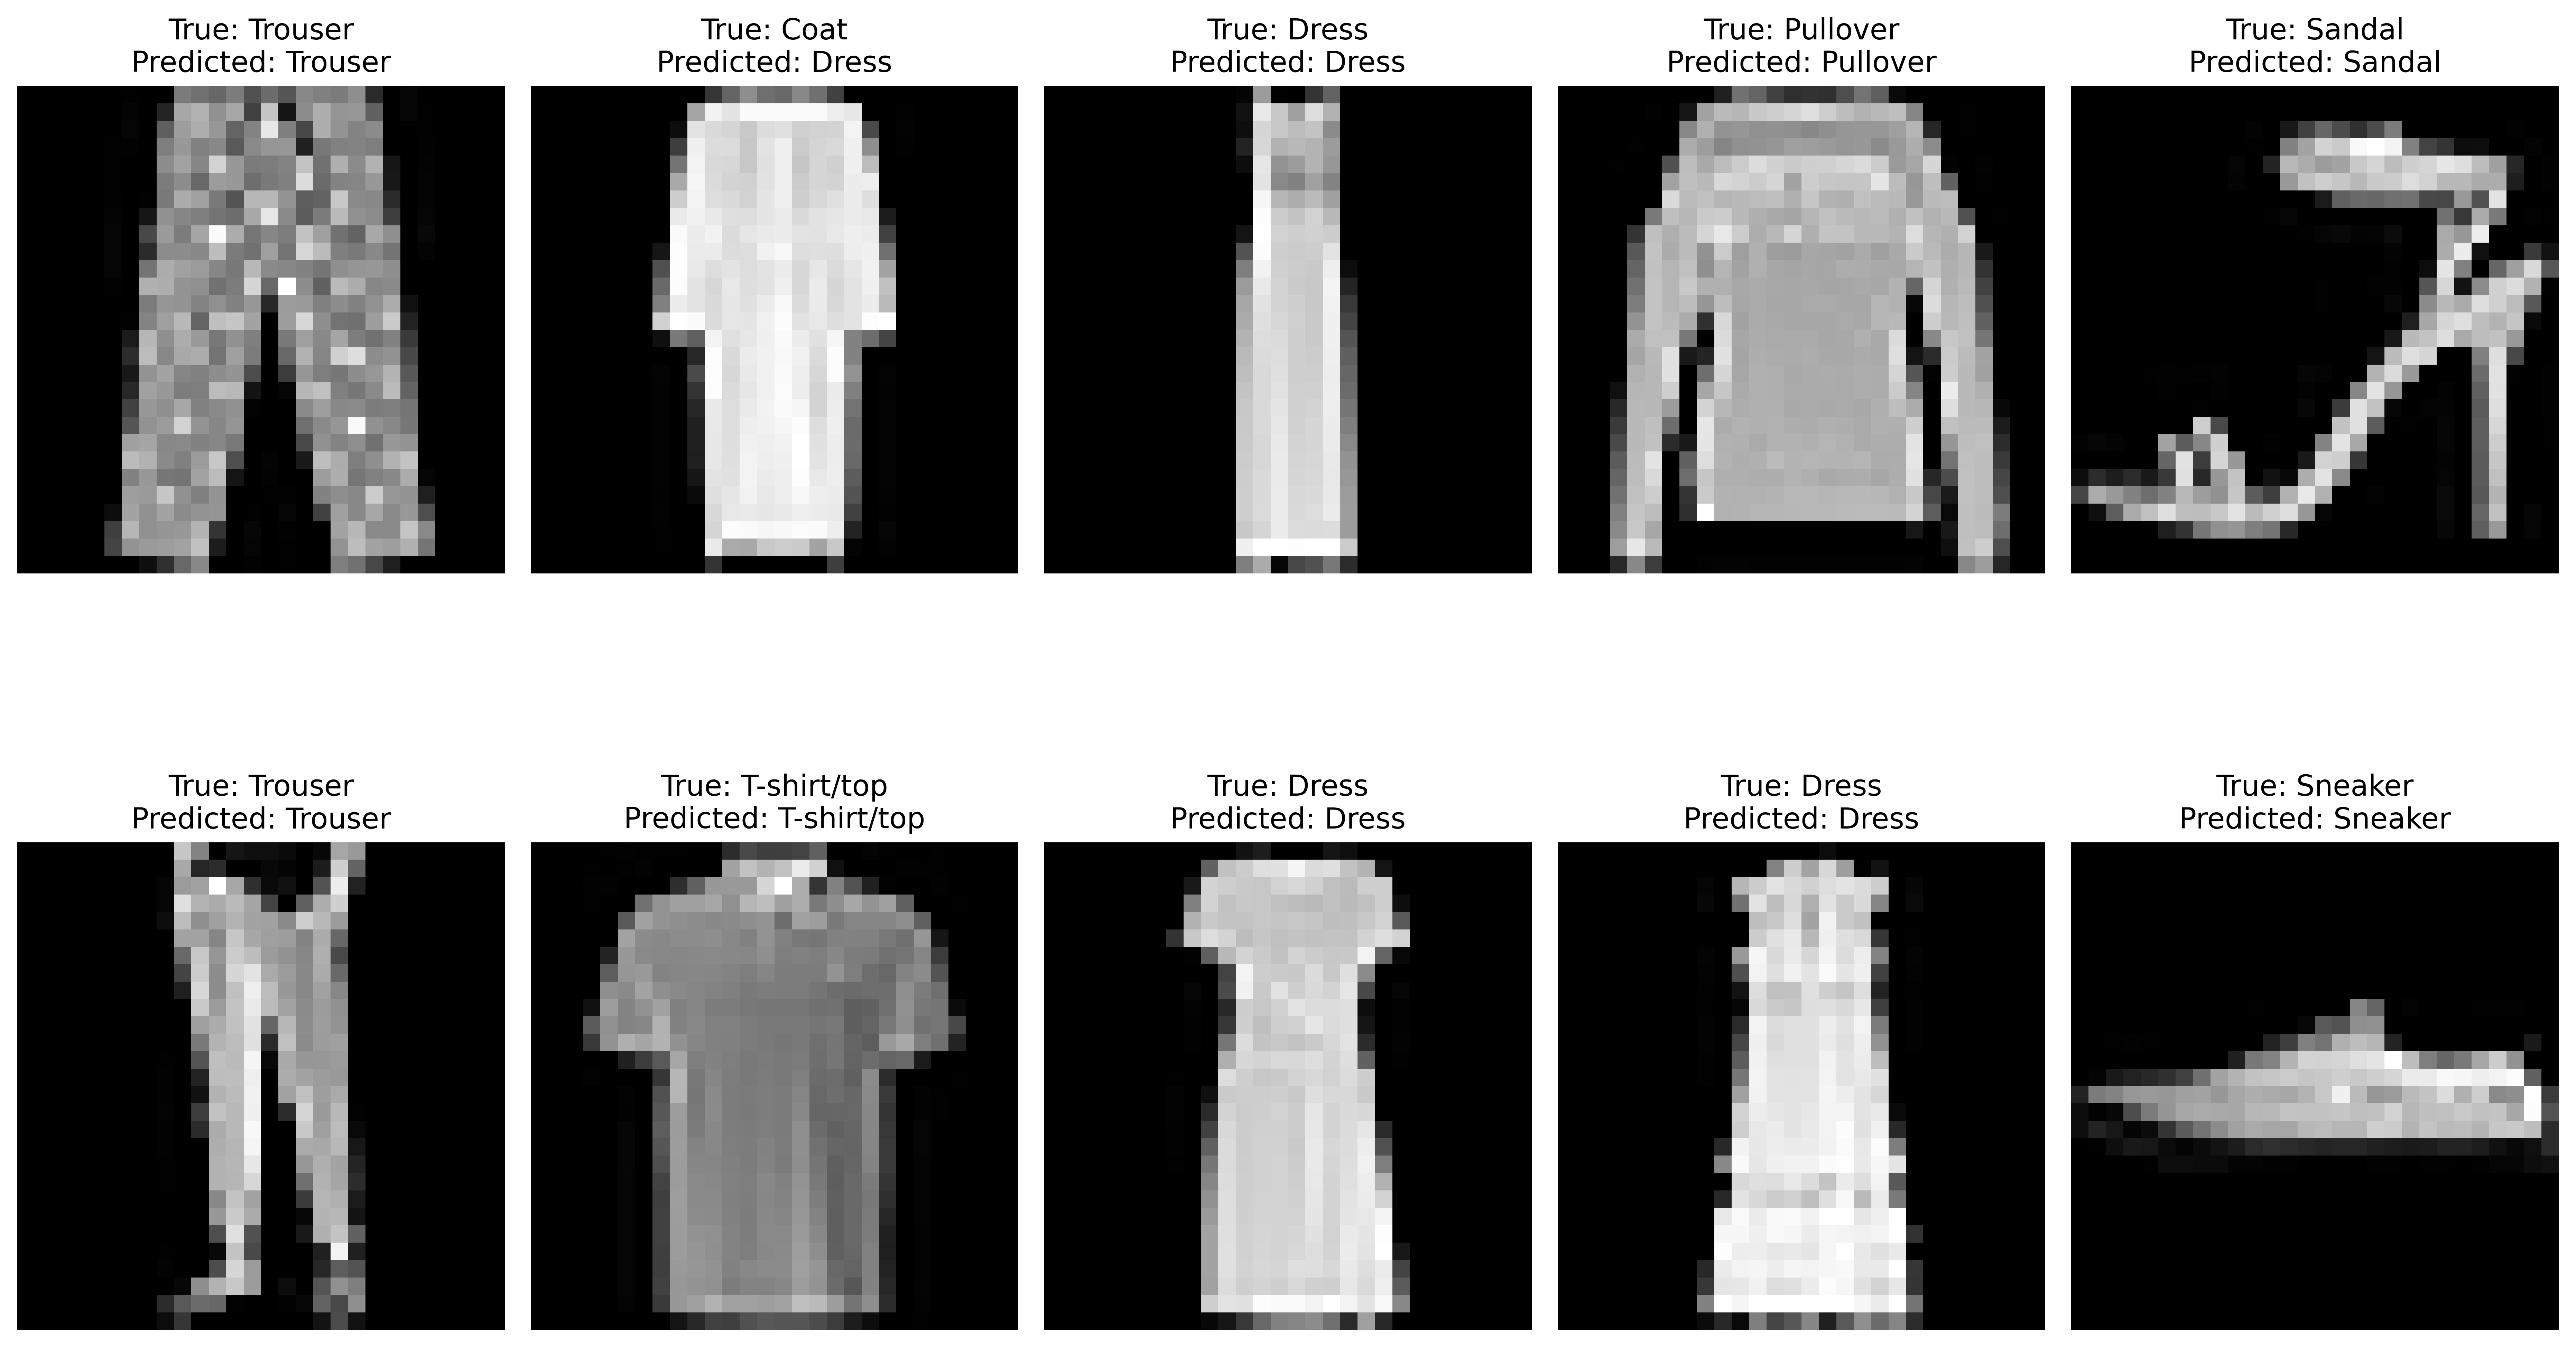

In [33]:
import matplotlib.pyplot as plt

# Get the true class names for the test set
true_classes_indices = np.argmax(y_test_encoded, axis=1)
true_class_names = [class_names_list[index] for index in true_classes_indices]

# Select a few random indices to display
num_samples_to_show = 10
random_indices = np.random.choice(x_test.shape[0], num_samples_to_show, replace=False)

plt.figure(figsize=(15, 10), dpi=500) # Increased DPI for better quality

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {true_class_names[idx]}\nPredicted: {predicted_class_names[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Save the figure with higher quality
# plt.savefig('fashion_mnist_predictions.png', dpi=300, bbox_inches='tight')